In [47]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Load dataset
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        1000 non-null   int64  
 1   Brand         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Fuel Type     1000 non-null   object 
 5   Transmission  1000 non-null   object 
 6   Mileage       1000 non-null   int64  
 7   Condition     1000 non-null   object 
 8   Price         1000 non-null   float64
 9   Model         1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [ ]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,2011.717000,3.471800,154296.816000,52413.74887
std,288.819436,6.979515,1.439297,88123.532936,27217.71298
min,1.000000,2000.000000,1.000000,36.000000,5011.27000
25%,250.750000,2006.000000,2.200000,75913.750000,28808.93500
50%,500.500000,2012.000000,3.400000,159391.000000,53312.62500
75%,750.250000,2018.000000,4.700000,231976.250000,75402.92000
max,1000.000000,2023.000000,6.000000,299967.000000,99905.90000


#Data Preprocessing

In [ ]:
#checking missing values
df.isnull().sum()

,0
Car ID,0
Brand,0
Year,0
Engine Size,0
Fuel Type,0
Transmission,0
Mileage,0
Condition,0
Price,0
Model,0


In [ ]:
#Drop unnecessary ID column if present
if 'Car ID' in df.columns:
    df.drop(columns=['Car ID'], inplace=True)

In [ ]:
# Encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
df.head()

,Year,Engine Size,Mileage,Price,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,Brand_Toyota,...,Model_Model S,Model_Model X,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5
0,2016,2.3,114832,26613.92,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1,2018,4.4,143190,14679.61,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2013,4.5,181601,44402.61,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2011,4.1,68682,86374.33,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,2009,2.6,223009,73577.10,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
#check for duplicates
df.drop_duplicates()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...
995,Mercedes,2020,2.3,Hybrid,Automatic,186968,Used,18929.93,E-Class
996,Toyota,2014,5.3,Petrol,Automatic,165912,Like New,91318.02,Corolla
997,Tesla,2021,1.5,Diesel,Automatic,173327,Used,31929.43,Model Y
998,BMW,2019,1.6,Hybrid,Automatic,128165,New,90445.55,X3


#Exploratory Data Analysis (EDA)

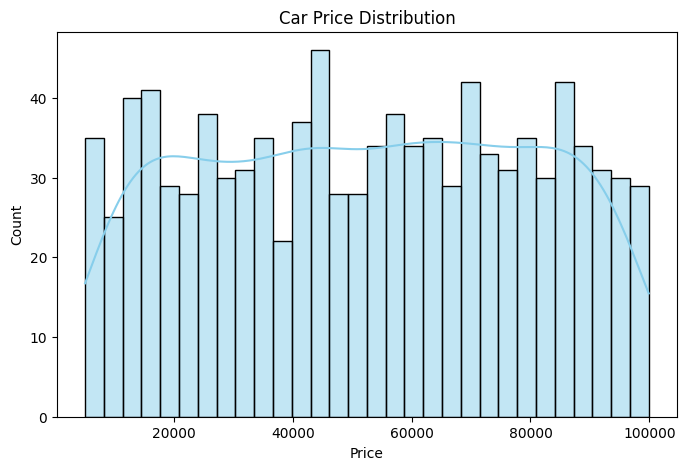

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title("Car Price Distribution")
plt.show()


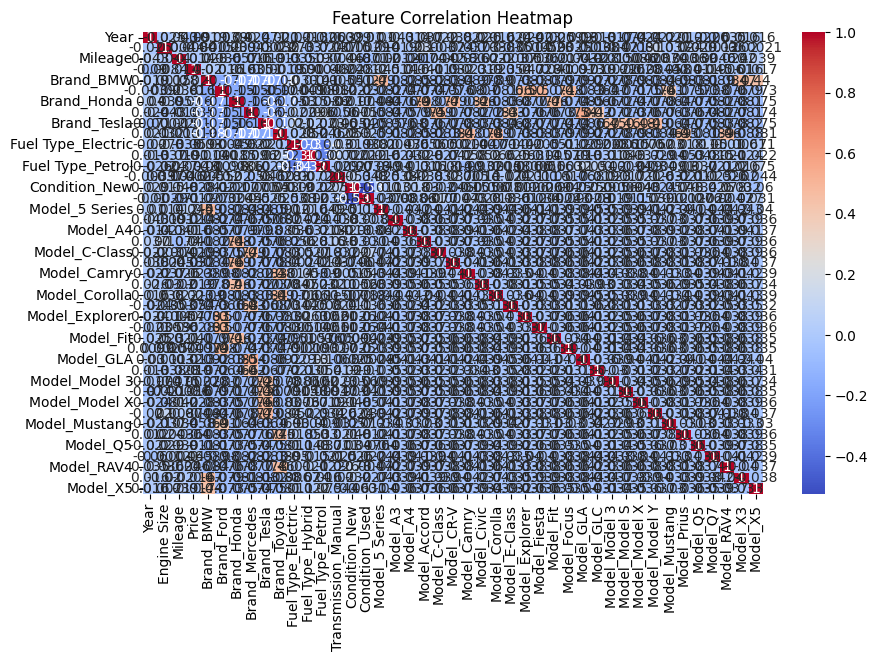

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#Feature Engineering

In [ ]:
# Define input (X) and output (y)
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Model Building

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train model
model = RandomForestRegressor(random_state=42, n_estimators=200)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

#Model Evaluation

In [ ]:
# Predict on test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

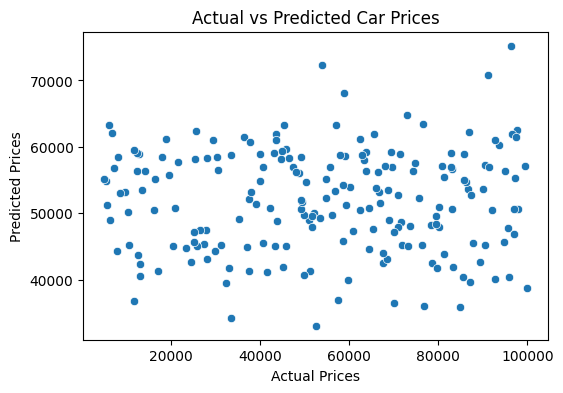

In [ ]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()

#Predicting a new car price

In [ ]:
#Create your new car data
new_car = pd.DataFrame({
    'Brand': ['BMW'],
    'Year': [2022],
    'Engine Size': [3.5],
    'Fuel Type': ['Electric'],
    'Transmission': ['Automatic'],
    'Mileage': [45000],
    'Condition': ['New'],
    'Model': ['5 Series']
})

In [ ]:
#One-hot encode this new data to match training columns
new_car_encoded = pd.get_dummies(new_car)


In [ ]:
# Align with training features (so columns match)
new_car_encoded = new_car_encoded.reindex(columns=X.columns, fill_value=0)

In [ ]:
#Predict price
predicted_price = model.predict(new_car_encoded)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
#Display result
print("New Car Details ")
print(new_car)
print("\n Predicted Selling Price: ₹", round(predicted_price[0], 2))

New Car Details 
  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition     Model
0   BMW  2022          3.5  Electric    Automatic    45000       New  5 Series

 Predicted Selling Price: ₹ 53451.57
